# Covid Forecast For Bangladesh on a Weekly and Monthly Basis

The main goal is to predict the recent covid situation of Bangladesh.

In [1]:
#library
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_confirmed_cases = pd.read_csv('/content/drive/MyDrive/Sakib/Covid 19 recent prediction/CONVENIENT_global_confirmed_cases.csv')
df_deaths_cases = pd.read_csv('/content/drive/MyDrive/Sakib/Covid 19 recent prediction/CONVENIENT_global_deaths.csv')
df_recovered_cases = pd.read_csv('/content/drive/MyDrive/Sakib/Covid 19 recent prediction/archive/time_series_covid19_recovered_global.csv')

In [3]:
df_confirmed_cases.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_deaths_cases.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_recovered_cases.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [4]:
df_confirmed_cases.head()

,Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_deaths_cases.head()

,Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_recovered_cases.head()

,Province/State,Country,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/17/2022,6/18/2022,6/19/2022,6/20/2022,6/21/2022,6/22/2022,6/23/2022,6/24/2022,6/25/2022,6/26/2022
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
confirmed=pd.DataFrame(df_confirmed_cases[["Country","Bangladesh"]])


In [8]:
def transform_data(df=None, name=None):
    return df[df['Country'] == name].iloc[:, 3:].T

In [9]:
confirmed.columns = ['ds','y']
confirmed

,ds,y
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
916,7/26/22,621.0
917,7/27/22,626.0
918,7/28/22,618.0
919,7/29/22,355.0


In [10]:
confirmed = confirmed[1:]
confirmed

,ds,y
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
916,7/26/22,621.0
917,7/27/22,626.0
918,7/28/22,618.0
919,7/29/22,355.0


In [11]:
confirmed.isnull().sum()

ds    0
y     0
dtype: int64

In [12]:
confirmed.describe()

,y
count,920.000000
mean,2179.230435
std,3064.793573
min,0.000000
25%,277.000000
50%,1233.500000
75%,2582.500000
max,16230.000000


# Using Facebook Prophet
Using this as a model for prediction.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook's Core Data Science team. It is available for download on CRAN and PyPI.



In [19]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.6 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


## **Why I am using Prophet**

***Accurate and fast.*** 

Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. We’ve found it to perform better than any other approach in the majority of cases. We fit models in Stan so that you get forecasts in just a few seconds.

***Fully automatic.***

Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

***Tunable forecasts.***

The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge.

***Available in R or Python.***

We’ve implemented the Prophet procedure in R and Python, but they share the same underlying Stan code for fitting. Use whatever language you’re comfortable with to get forecasts.

**Reference:**

Homepage: https://facebook.github.io/prophet/

HTML documentation: https://facebook.github.io/prophet/docs/quick_start.html

Issue tracker: https://github.com/facebook/prophet/issues

Source code repository: https://github.com/facebook/prophet

Contributing: https://facebook.github.io/prophet/docs/contributing.

html
Prophet R package: https://cran.r-project.org/package=prophet

Prophet Python package: https://pypi.python.org/pypi/prophet/

Release blogpost: https://research.fb.com/prophet-forecasting-at-scale/

Prophet paper:
Sean J. Taylor, Benjamin Letham (2018) Forecasting at scale. The American Statistician 72(1):37-45 (https://peerj.com/preprints/3190.pdf).

In [20]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-kcft3ss3/fbprophet_8f4484f5244948c2a4f76a67296264af/setup.py'"'"'; __file__='"'"'/tmp/pip-install-kcft3ss3/fbprophet_8f4484f5244948c2a4f76a67296264af/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2rbf7le3/install-record.txt --single-version-externally-managed --compile --install-hea

In [24]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 115 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Weekly Prediction using Prophet

In [27]:
from prophet import Prophet
from sklearn.metrics import r2_score

In [28]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds
922,2022-08-02
923,2022-08-03
924,2022-08-04
925,2022-08-05
926,2022-08-06


In [29]:
forecast = m.predict(future)

In [30]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
922,2022-08-02,2522.935534,-1305.482368,6589.003331
923,2022-08-03,2453.581915,-1489.949281,6400.310858
924,2022-08-04,2299.474178,-1500.645396,6442.487948
925,2022-08-05,2122.470251,-1884.529860,6023.254791
926,2022-08-06,1569.742254,-2678.713563,5517.864955


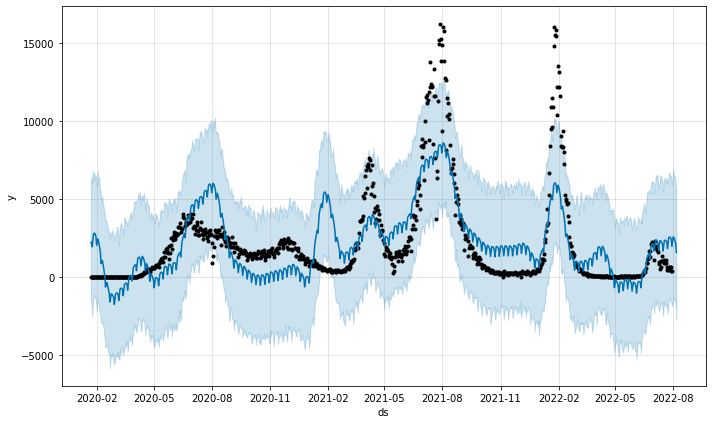

In [31]:
confirmed_forecast_plot = m.plot(forecast)

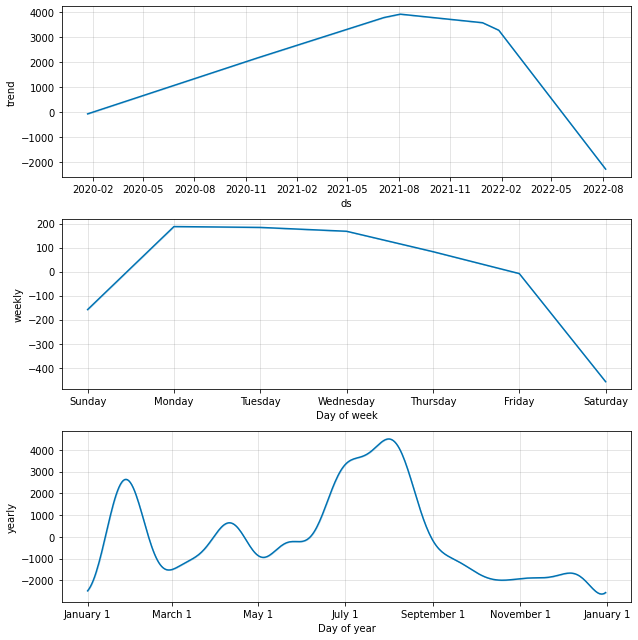

In [32]:
confirmed_forecast_plot = m.plot_components(forecast)

In [33]:
death=pd.DataFrame(df_deaths_cases[["Country","Bangladesh"]])

In [34]:
death

,Country,Bangladesh
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
916,7/26/22,4.0
917,7/27/22,5.0
918,7/28/22,4.0
919,7/29/22,1.0


In [35]:
death.columns = ['ds','y']
death

,ds,y
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
916,7/26/22,4.0
917,7/27/22,5.0
918,7/28/22,4.0
919,7/29/22,1.0


In [36]:
death = death[1:]
death

,ds,y
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
916,7/26/22,4.0
917,7/27/22,5.0
918,7/28/22,4.0
919,7/29/22,1.0


In [37]:
death.describe()

,y
count,920.000000
mean,31.834783
std,49.014187
min,0.000000
25%,3.000000
50%,17.000000
75%,37.000000
max,264.000000


In [38]:
m = Prophet(interval_width=0.95)
m.fit(death)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds
922,2022-08-02
923,2022-08-03
924,2022-08-04
925,2022-08-05
926,2022-08-06


In [39]:
forecast1 = m.predict(future)
forecast1[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
922,2022-08-02,49.246917,1.615989,97.235668
923,2022-08-03,48.472242,-0.144284,97.267446
924,2022-08-04,49.595767,-0.379170,99.351620
925,2022-08-05,46.556623,-2.676781,94.209279
926,2022-08-06,47.089424,-0.500277,98.519655


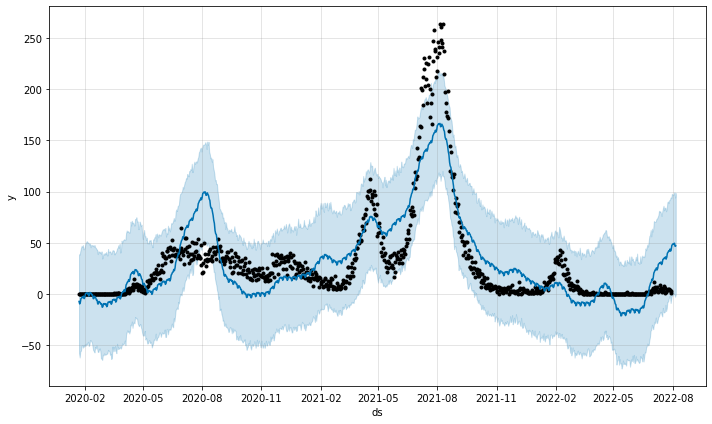

In [40]:
death_forecast_plot = m.plot(forecast1)

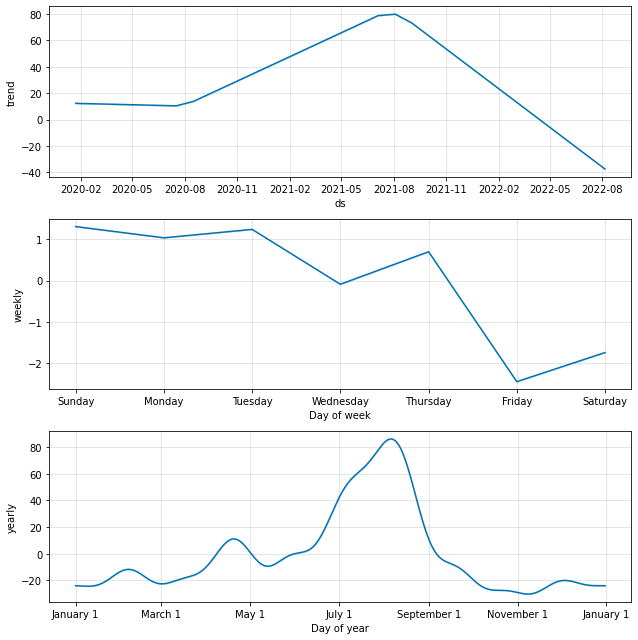

In [41]:
death_forecast_plot = m.plot_components(forecast1)

In [42]:
class Fbprophet(object):
  def fit(self,data):
    self.data  = data
    self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
    self.model.fit(self.data)
    
  def forecast(self,periods,freq):
    self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
    self.df_forecast = self.model.predict(self.future)
        
  def plot(self,xlabel="Years",ylabel="Values"):
    self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
    self.model.plot_components(self.df_forecast,figsize=(9,6))
        
  def R2(self):
    return r2_score(self.data.y, self.df_forecast.yhat[:len(confirmed)])
    

In [43]:
model = Fbprophet()
model.fit(confirmed)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [44]:
model.forecast(7,"D")

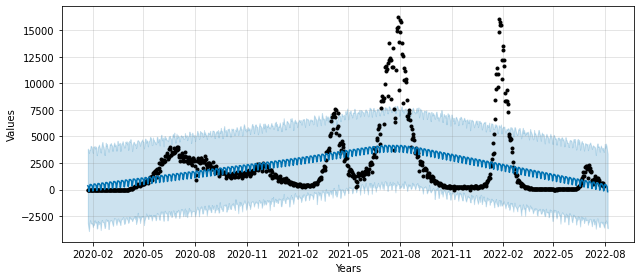

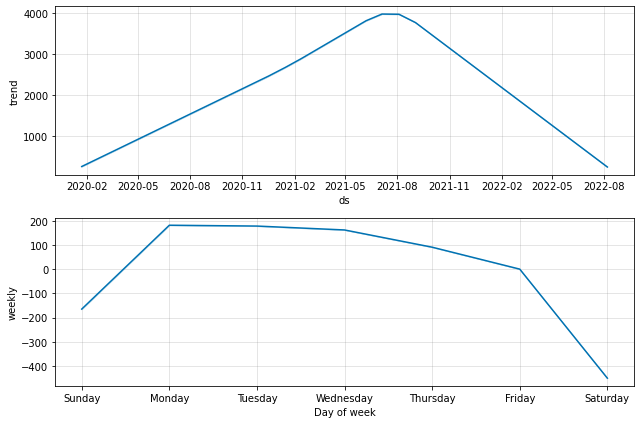

In [45]:
model.plot()

In [46]:
model.R2()

0.1803682099868279

In [47]:
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(7).reset_index().set_index("ds").drop("index",axis=1)
forecast.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2022-07-31,-3575.378866,3767.415673,154.092591
2022-08-01,-3041.457129,4300.285737,489.925535
2022-08-02,-3177.265171,3930.282705,476.073186
2022-08-03,-2902.711150,4328.032062,449.588295
2022-08-04,-3045.733970,4123.597378,368.060318


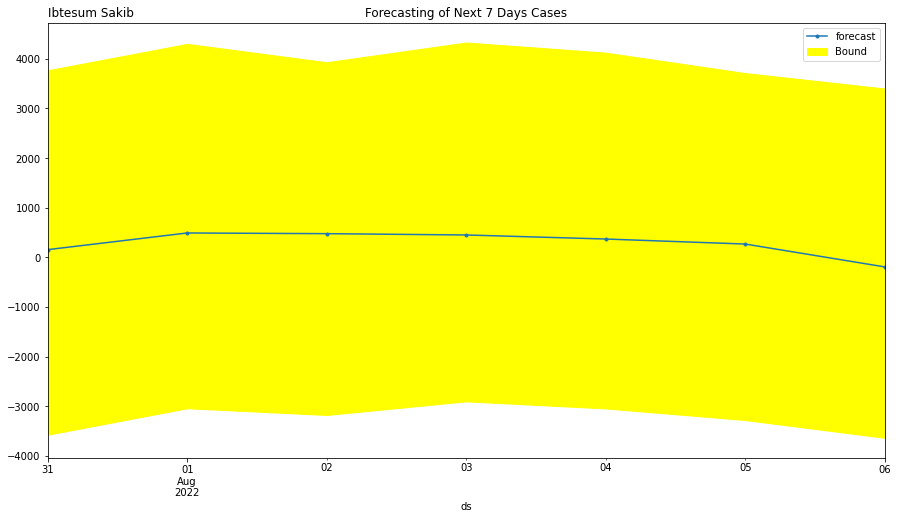

In [48]:
forecast["yhat"].plot(marker=".",figsize=(15,8))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="yellow")
plt.legend(["forecast","Bound"])
plt.title("Forecasting of Next 7 Days Cases")
plt.title("Ibtesum Sakib",loc="left")
plt.show()

In [49]:
class Fbprophet1(object):
  def fit(self,data):
    self.data  = data
    self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
    self.model.fit(self.data)
    
  def forecast(self,periods,freq):
    self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
    self.df_forecast = self.model.predict(self.future)
        
  def plot(self,xlabel="Years",ylabel="Values"):
    self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
    self.model.plot_components(self.df_forecast,figsize=(9,6))
        
  def R2(self):
    return r2_score(self.data.y, self.df_forecast.yhat[:len(death)])

In [50]:
model1 = Fbprophet1()
model1.fit(death)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [51]:
model1.forecast(7,"D")

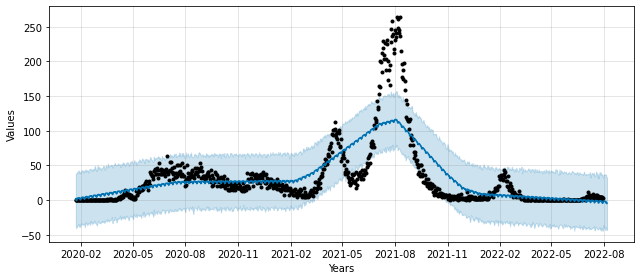

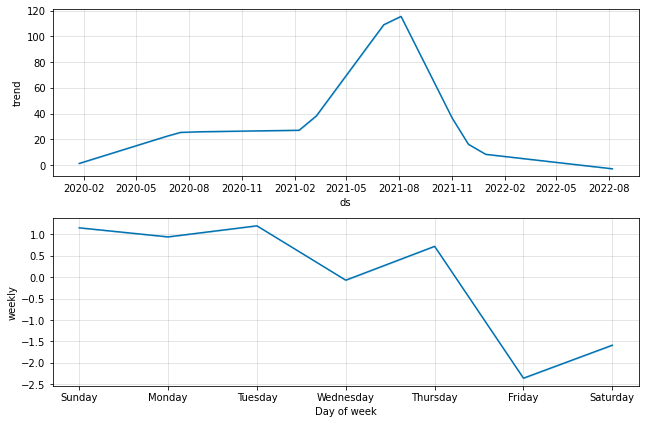

In [52]:
model1.plot()

In [53]:
model1.R2()

0.6149390019781868

In [54]:
forecast1 = model1.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(7).reset_index().set_index("ds").drop("index",axis=1)
forecast1.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2022-07-31,-36.165359,36.946484,-1.347127
2022-08-01,-40.215022,36.535573,-1.610190
2022-08-02,-39.509053,37.305675,-1.402526
2022-08-03,-43.326512,36.704577,-2.724072
2022-08-04,-38.935630,36.917114,-1.984334


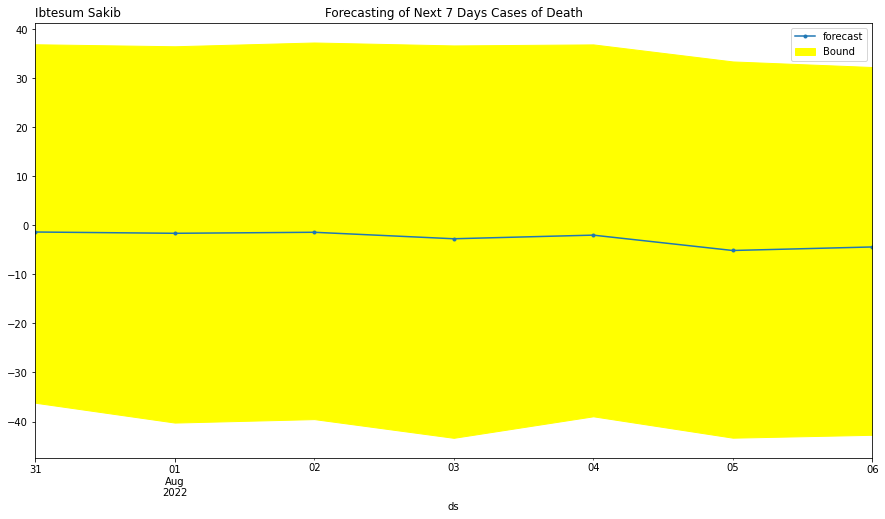

In [55]:
forecast1["yhat"].plot(marker=".",figsize=(15,8))
plt.fill_between(x=forecast1.index, y1=forecast1["yhat_lower"], y2=forecast1["yhat_upper"],color="yellow")
plt.legend(["forecast","Bound"])
plt.title("Forecasting of Next 7 Days Cases of Death")
plt.title("Ibtesum Sakib",loc="left")
plt.show()

## Monthly Prediction

In [ ]:
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2022-06-25,-42.730125,33.193835,-4.362721
2022-06-26,-40.420634,37.285645,-1.620515
2022-06-27,-43.892881,36.895078,-1.988903
2022-06-28,-40.856712,36.983938,-1.779578
2022-06-29,-41.058159,34.239991,-3.075752


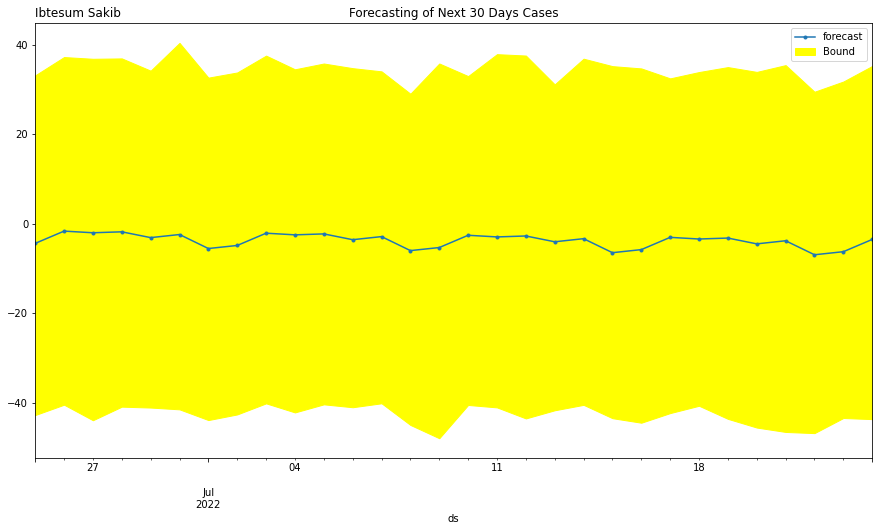

In [ ]:
forecast["yhat"].plot(marker=".",figsize=(15,8))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="yellow")
plt.legend(["forecast","Bound"])
plt.title("Forecasting of Next 30 Days Cases")
plt.title("Ibtesum Sakib",loc="left")
plt.show()

In [ ]:
forecast1 = model1.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast1.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2022-06-25,-43.709589,33.195051,-4.362721
2022-06-26,-40.681061,38.245571,-1.620515
2022-06-27,-39.646113,36.992486,-1.988903
2022-06-28,-39.416004,37.479013,-1.779578
2022-06-29,-43.093542,36.288176,-3.075752


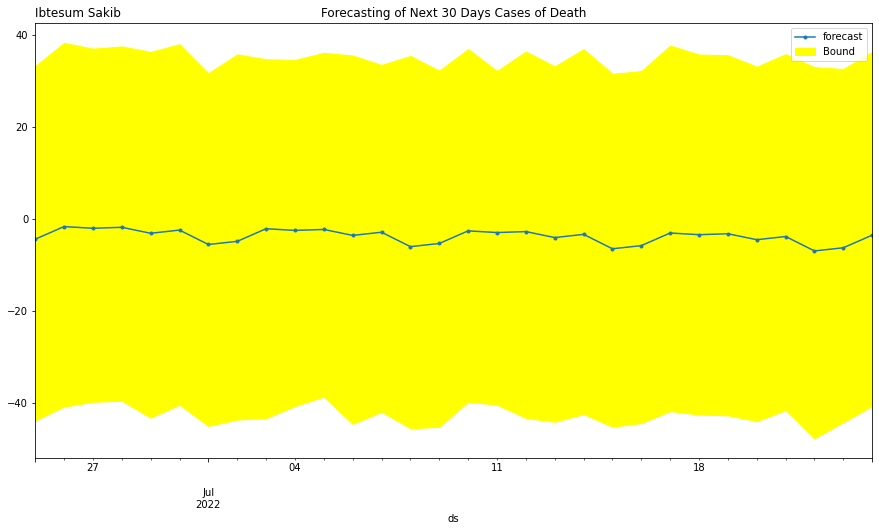

In [ ]:
forecast1["yhat"].plot(marker=".",figsize=(15,8))
plt.fill_between(x=forecast1.index, y1=forecast1["yhat_lower"], y2=forecast1["yhat_upper"],color="yellow")
plt.legend(["forecast","Bound"])
plt.title("Forecasting of Next 30 Days Cases of Death")
plt.title("Ibtesum Sakib",loc="left")
plt.show()